# **2017 Full-field Data, Treatment II**
***Objective:* produce a mask that will allow working with the lazurite particles only while ignoring contributions from the background**

## Treatment IIa:
***Objective:* produce a mean image from normalized full-field XANES spectral cubes**

### Program: 
[Jupyter notebook 5.5.0, Python 3.6.5]


### Input: 
- normalized full-field XANES spectral cubes, type = .hdf5, [dataset22] ()
> H020_norm.hdf <br> H415_norm.hdf <br> H750_norm.hdf <br> H020oilL4_norm.hdf <br> H750oilL4_norm.hdf

### Steps:
- follow script below

### Output:
- mean images, type = .png [dataset23] ()
> mean_value_H020_norm_date.png <br> 
mean_value_H415_norm_date.png <br> 
mean_value_H750_norm_date.png <br> 
mean_value_H020oilL4_norm_date.png <br> 
mean_value_H750oilL4_norm_date.png

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

In [1]:
## enter today's date
date = '2019date'

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tables
from scipy import ndimage
import skimage.measure 
import imageio
import numpy as np
import pandas as pd
import os
import scipy.misc
import matplotlib.pyplot as plt 

In [4]:
##standards for figures

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Start here for each new file import...

Change directory below to where full field files are located...

In [6]:
cd dataset_22

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_22


In [7]:
figsize(16, 16)

In [8]:
##choose the normalized H- file to import

#filename = 'H020_norm.hdf'          ##for room temperature (ie 20 C) sample
filename = 'H415_norm.hdf'           ##for 415 C sample
#filename = 'H750_norm.hdf'          ##for 750 C sample
#filename = 'H020oilL4_norm.hdf'     ##for 750 C sample plus oil and artificial aging
#filename = 'H750oilL4_norm.hdf'     ##for room temperature sample plus oil and artificial aging

##see other python sheet for 600 C sample

h5 = tables.open_file(filename)

In [9]:
##preparation for saving
basename, ext = os.path.splitext(filename)
basename, ext

('H415_norm', '.hdf')

In [10]:
##for all normalized files
data = h5.root.data[:] ##for normalized data, hdf
data.shape  ##want (energy, spatial 1, spatial 2)
#data.dtype

(140, 2179, 1720)

(2179, 1720)


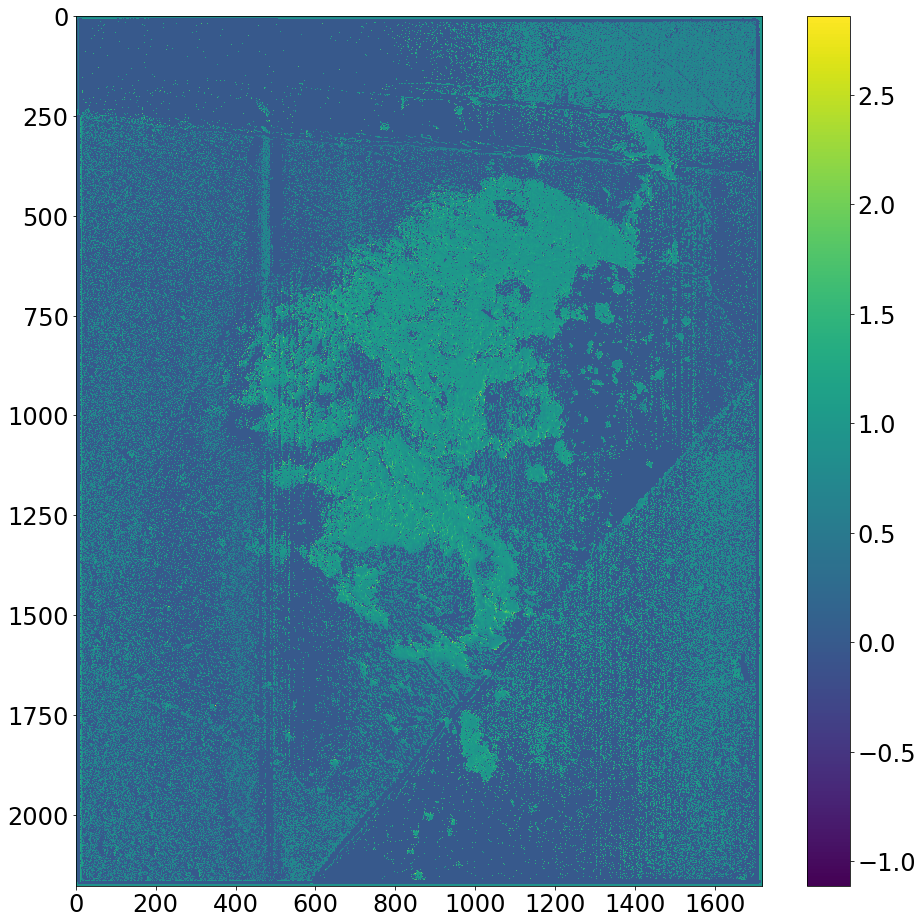

In [11]:
##calculates the mean intensity over all energies and displays as an image
mn = data.mean(axis=0)
print(mn.shape)
imshow(mn)
colorbar()

In [12]:
##the min and max mean intensity
mn.min(), mn.max()
#np.min(mn), np.max(mn) ##other way of writting it

(-1.1111252, 2.8589835)

Change directory to where you want to save mean images

In [14]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets


In [16]:
cd dataset_23

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_23


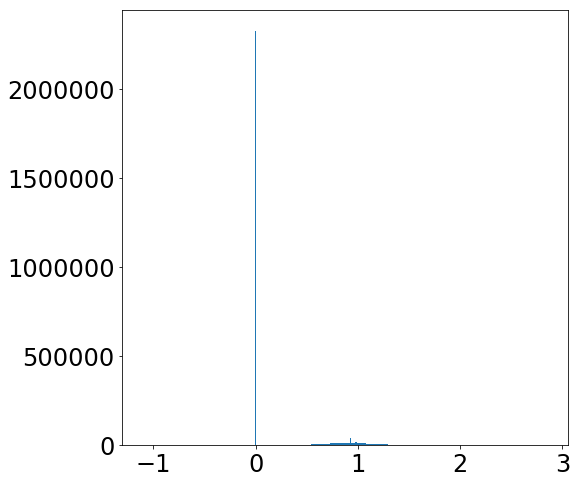

In [17]:
##making a histogram for all pixels
figsize(8, 8)

##need 1D data, can run this...
#hist(mn.reshape(-1), 1000)  ##this reshapes array to be 1D for histogram array

##or this...
hist(mn[~isnan(mn)], 1000); ##boolean slices automatically becomes one dimension

In [18]:
##this should output 1
##note: ptp is max - min
((mn - mn.min())/mn.ptp()).max()

1.0

In [19]:
##preparation for 8-bit RGB image
colors = uint8(255 * cm.viridis(((mn - mn.min())/mn.ptp()))[...,:3]) # ... means all rows and all columns, :3 means 'RGBA'[:3] -> RGB
#colors.shape
colors.max(axis=(0,1))

array([253, 231, 142], dtype=uint8)

In [20]:
##save mean image as a .png form which to create mask
imageio.imwrite
imsave('mean_value_' + basename + '_' + date + '.png', colors)

### continue to sheet '04b_2017FF_Treatment-IIa...' for H-600 and '05_2017FF_Treatment-IIb...' for all